In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt

%matplotlib inline

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LeakyReLU
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.callbacks import History

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
root = '../'
path_image = root+'Data/DataSub/Images/'
path_label = root+'Data/DataSub/Label/'

In [3]:
data = pd.read_csv(path_label+'label_shf.csv')

In [4]:
name = data['name']

In [5]:
def data_loader(folder):
    images = []
    foo = []
    for filename in name:
        filename_ = str(filename)+'.jpg'
        img = cv2.imread(os.path.join(folder,filename_))
        if img is not None:
            images.append(img)
            foo.append(filename)
    return (images, foo)

In [6]:
image, foo = data_loader(path_image)

In [7]:
image = np.asarray(image)
image.shape

(8970, 32, 32, 3)

In [8]:
label = []
for i in range(len(foo)):
    label.append(data.loc[data['name']==foo[i], 'label'].iloc[0])

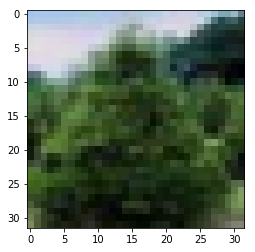

In [9]:
plt.imshow(image[0])

In [10]:
X_train = image[:7000]

In [11]:
Y = to_categorical(label)

In [12]:
Y_train = Y[:7000]

In [13]:
def classification(pretrained_weights = None):
    model = Sequential()
    model.add(Conv2D(16, (5, 5), input_shape=(32, 32, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(20, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=adam(lr=1e-4), metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)
    
    return model

In [14]:
model = classification()
checkpointer = ModelCheckpoint('Model/try319.h5', verbose=1, save_best_only=False)
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=32, epochs=50, callbacks=[checkpointer])

Train on 6300 samples, validate on 700 samples
Epoch 1/50
6300/6300 [==============================] - 121s - loss: 2.7403 - acc: 0.2037 - val_loss: 2.5569 - val_acc: 0.2386
Epoch 2/50
6300/6300 [==============================] - 117s - loss: 2.4466 - acc: 0.2635 - val_loss: 2.4586 - val_acc: 0.2514
Epoch 3/50
6300/6300 [==============================] - 116s - loss: 2.3153 - acc: 0.2984 - val_loss: 2.4428 - val_acc: 0.2814
Epoch 4/50
6300/6300 [==============================] - 116s - loss: 2.2394 - acc: 0.3181 - val_loss: 2.4311 - val_acc: 0.2914
Epoch 5/50
6300/6300 [==============================] - 116s - loss: 2.1674 - acc: 0.3405 - val_loss: 2.3428 - val_acc: 0.3014
Epoch 6/50
6300/6300 [==============================] - 121s - loss: 2.0907 - acc: 0.3594 - val_loss: 2.3026 - val_acc: 0.3014
Epoch 7/50
6300/6300 [==============================] - 116s - loss: 2.0234 - acc: 0.3816 - val_loss: 2.2818 - val_acc: 0.2986
Epoch 8/50
6300/6300 [==============================] - 115s - l

6300/6300 [==============================] - 114s - loss: 0.4398 - acc: 0.8727 - val_loss: 2.3440 - val_acc: 0.4771
Epoch 34/50
6300/6300 [==============================] - 114s - loss: 0.3871 - acc: 0.8824 - val_loss: 2.4147 - val_acc: 0.4586
Epoch 35/50
6300/6300 [==============================] - 115s - loss: 0.3871 - acc: 0.8870 - val_loss: 2.3738 - val_acc: 0.4700
Epoch 36/50
6300/6300 [==============================] - 115s - loss: 0.3508 - acc: 0.8940 - val_loss: 2.3413 - val_acc: 0.4871
Epoch 37/50
6300/6300 [==============================] - 115s - loss: 0.3228 - acc: 0.8992 - val_loss: 2.4012 - val_acc: 0.4657
Epoch 38/50
6300/6300 [==============================] - 116s - loss: 0.3042 - acc: 0.9083 - val_loss: 2.4275 - val_acc: 0.4686
Epoch 39/50
6300/6300 [==============================] - 116s - loss: 0.2986 - acc: 0.9116 - val_loss: 2.4772 - val_acc: 0.4829
Epoch 40/50
6300/6300 [==============================] - 114s - loss: 0.2677 - acc: 0.9202 - val_loss: 2.5267 - val_

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1216      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [16]:
params = list(results.history.keys())
xaxis = []
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']
loss = results.history['loss']
acc = results.history['acc']

for i in range(50):
    xaxis.append(i+1)

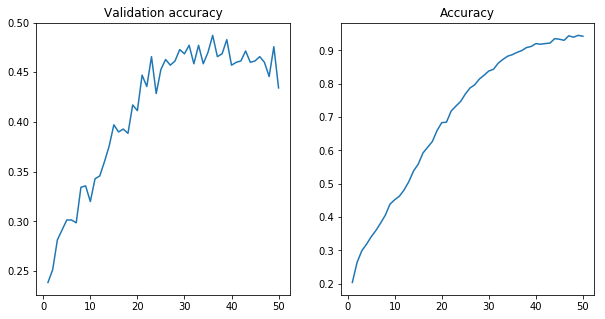

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(xaxis, val_acc)
plt.title('Validation accuracy')
plt.subplot(1, 2, 2)
plt.plot(xaxis, acc)
plt.title('Accuracy')

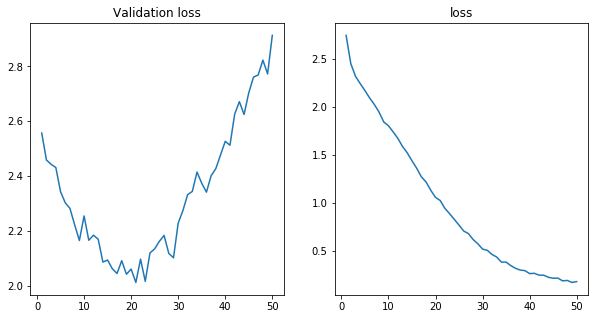

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(xaxis, val_loss)
plt.title('Validation loss')
plt.subplot(1, 2, 2)
plt.plot(xaxis, loss)
plt.title('loss')

In [19]:
model = classification('Model/try319.h5')

In [20]:
label_names = ['aquatic mammals',
               'fish',
               'flowers',
               'food containers',
               'fruit and vegetables',
               'household electrical devices',
               'household furniture',
               'insects',
               'large carnivores',
               'large man-made outdoor things',
               'large natural outdoor scenes',
               'large omnivores and herbivores',
               'medium-sized mammals',
               'non-insect invertebrates',
               'human',
               'reptiles',
               'small mammals',
               'trees',
               'vehicles',
               'vehicles']

In [22]:
X_test = image[7000:]
Y_test = Y[7000:]
label_test = label[7000:]

In [23]:
pred = model.predict(X_test)

In [24]:
pred[0]

array([1.82785079e-05, 4.92734398e-05, 5.49949982e-06, 1.54103036e-05,
       2.38356435e-07, 2.01284915e-04, 1.14449074e-04, 6.65191794e-03,
       9.00162340e-05, 9.29237576e-04, 6.46840199e-05, 6.06140711e-05,
       2.43198025e-04, 1.97819492e-04, 1.70388903e-05, 2.06352634e-04,
       5.52861929e-05, 3.12118354e-05, 9.91035581e-01, 1.25868601e-05],
      dtype=float32)

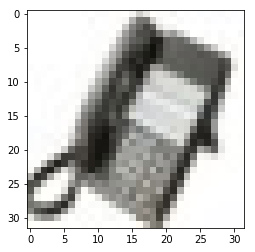

In [64]:
plt.imshow(X_test[8])

In [65]:
Y_test[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [66]:
(pred[8].tolist()).index(max(pred[8]))

5

In [119]:
def test_on_random(filename):
    path = root+'/Data/Random/'+str(filename)+'.jpg'
    img = cv2.imread(path)
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape(1, 32, 32, 3)
    cnn = model.predict(img[:,:,:])
    plt.imshow(img[0])
    foo = label_names[(cnn[0].tolist()).index(max(cnn[0]))]
    return foo

'food containers'

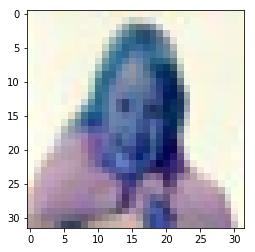

In [120]:
test_on_random(1)

'human'

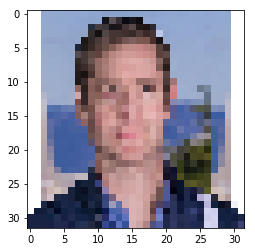

In [121]:
test_on_random(2)

'human'

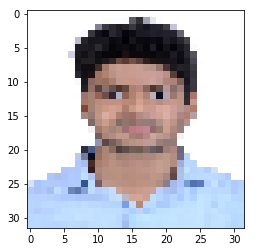

In [122]:
test_on_random(4)

'human'

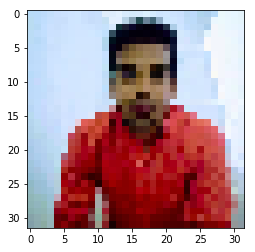

In [123]:
test_on_random(3)

'human'

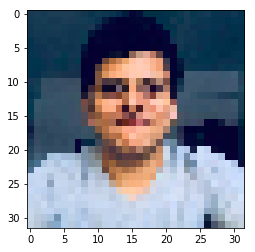

In [124]:
test_on_random(5)

'human'

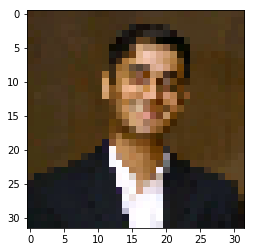

In [125]:
test_on_random(6)

'flowers'

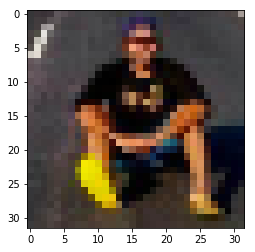

In [126]:
test_on_random(7)

'flowers'

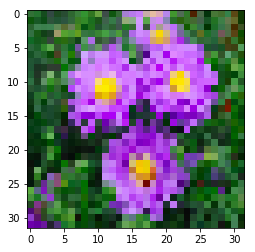

In [127]:
test_on_random(9)

'fish'

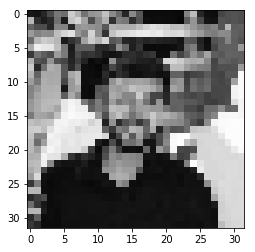

In [129]:
test_on_random(10)

'vehicles'

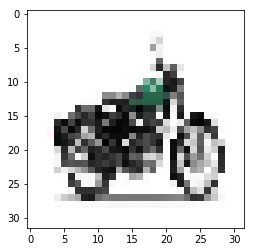

In [130]:
test_on_random(11)